In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [270]:
data = pd.read_csv('C:\\Users\\zoona\\Downloads\\archive\\restaurants.csv')

In [271]:
data.head()

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",NaN,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",$,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,$,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.404439,-86.806614
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700


In [272]:
data.tail()

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
63464,63465,2,IHOP (4321 N 10th St),4.6,56.0,"American, Breakfast and Brunch, burger, Comfor...",$,"4321 N 10th St, MC ALLEN, TX, 78504",78504,26.242853,-98.223984
63465,63466,29,Feldman's - N 10th Street,NaN,NaN,NaN,NaN,"3010 N 10th Street, Mc Allen, TX,",NaN,26.230764,-98.224922
63466,63467,27,Feldman's - N 23rd St,NaN,NaN,NaN,NaN,"6101 N 23rd Street #B, Mc Allen, TX,",NaN,26.260353,-98.236755
63467,63468,19,Church's Chicken (620 S. 10th Street),4.3,17.0,"Fast Food, Family Meals",$,"620 S. 10th Street, McAllen, TX, 78501",78501,26.197333,-98.231369
63468,63469,9,7-Eleven (1600 S 23rd St),NaN,NaN,"Everyday Essentials, Convenience, Home &amp; P...",$,"1600 S 23rd St, Mcallen, TX, 78503",78503,26.191710,-98.247880


In [273]:
data.shape

(63469, 11)

In [274]:
data.describe()

,id,position,score,ratings,lat,lng
count,63469.000000,63469.000000,35302.000000,35302.000000,63469.000000,63469.000000
mean,31735.000000,86.692102,4.551431,74.887060,36.585019,-96.715114
std,18322.066455,79.280129,0.300675,69.874057,6.458959,14.438166
min,1.000000,1.000000,1.300000,10.000000,0.000000,-123.841240
25%,15868.000000,18.000000,4.400000,25.000000,30.442221,-98.569760
50%,31735.000000,61.000000,4.600000,52.000000,34.707265,-96.764330
75%,47602.000000,141.000000,4.800000,100.000000,40.884903,-87.938729
max,63469.000000,300.000000,5.000000,500.000000,48.963950,0.000000


In [275]:
data.dtypes

id                int64
position          int64
name             object
score           float64
ratings         float64
category         object
price_range      object
full_address     object
zip_code         object
lat             float64
lng             float64
dtype: object

In [276]:
data.nunique()

id              63469
position          300
name            60865
score              33
ratings           433
category        15574
price_range         5
full_address    54946
zip_code         3082
lat             57227
lng             57249
dtype: int64

In [277]:
data.columns

Index(['id', 'position', 'name', 'score', 'ratings', 'category', 'price_range',
       'full_address', 'zip_code', 'lat', 'lng'],
      dtype='object')

In [278]:
uber = data.drop(["id", 'name', 'category', 'full_address'], axis=1)

In [279]:
uber.head()

,position,score,ratings,price_range,zip_code,lat,lng
0,19,NaN,NaN,$,35207,33.562365,-86.830703
1,9,NaN,NaN,NaN,35217,33.583640,-86.773330
2,6,NaN,NaN,$,35204,33.509800,-86.854640
3,17,NaN,NaN,$,35226,33.404439,-86.806614
4,162,4.7,22.0,NaN,35203,33.514730,-86.811700


In [280]:
uber.shape

(63469, 7)

In [281]:
uber.isna().sum()

position           0
score          28167
ratings        28167
price_range    10617
zip_code         517
lat                0
lng                0
dtype: int64

In [282]:
uber['score'] = uber['score'].fillna(data['score'].mode()[0])
uber['ratings'] = uber['ratings'].fillna(data['ratings'].mode()[0])
uber['price_range'] = uber['price_range'].fillna(data['price_range'].mode()[0])

In [283]:
uber = uber.reset_index(drop=True).copy()


In [284]:
uber['zip_code'] = pd.to_numeric(uber['zip_code'], errors='coerce')

In [285]:
# Redondear latitud y longitud a un decimal
uber['lat'] = uber['lat'].round(1)
uber['lng'] = uber['lng'].round(1)

In [286]:
uber.head()

,position,score,ratings,price_range,zip_code,lat,lng
0,19,4.7,200.0,$,35207.0,33.6,-86.8
1,9,4.7,200.0,$,35217.0,33.6,-86.8
2,6,4.7,200.0,$,35204.0,33.5,-86.9
3,17,4.7,200.0,$,35226.0,33.4,-86.8
4,162,4.7,22.0,$,35203.0,33.5,-86.8


In [287]:
uber.dtypes

position         int64
score          float64
ratings        float64
price_range     object
zip_code       float64
lat            float64
lng            float64
dtype: object

In [288]:
uber.isna().sum()

position          0
score             0
ratings           0
price_range       0
zip_code       1302
lat               0
lng               0
dtype: int64

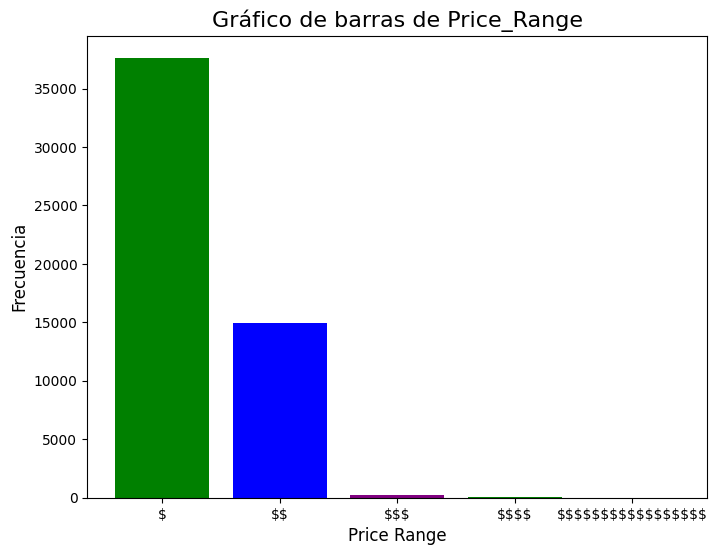

In [289]:
# Contar las frecuencias de cada categoría en 'price_range'
price_counts = data['price_range'].value_counts()

# Escapar los signos de dólar en las etiquetas
price_labels = price_counts.index.str.replace('$', r'\$', regex=False)

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(price_labels, price_counts.values, color=['green', 'blue', 'purple'])

# Añadir títulos y etiquetas
plt.title('Gráfico de barras de Price_Range', fontsize=16)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar el gráfico
plt.show()

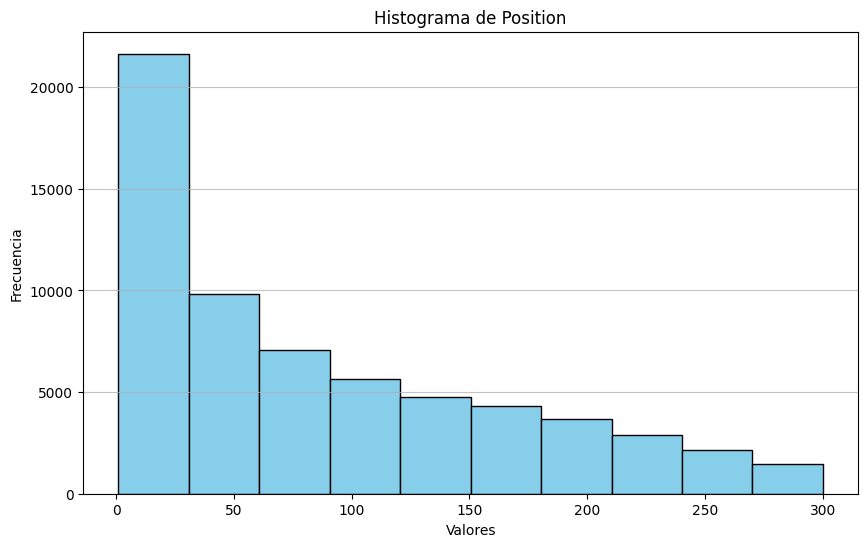

In [290]:
# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(uber['position'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma de Position')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

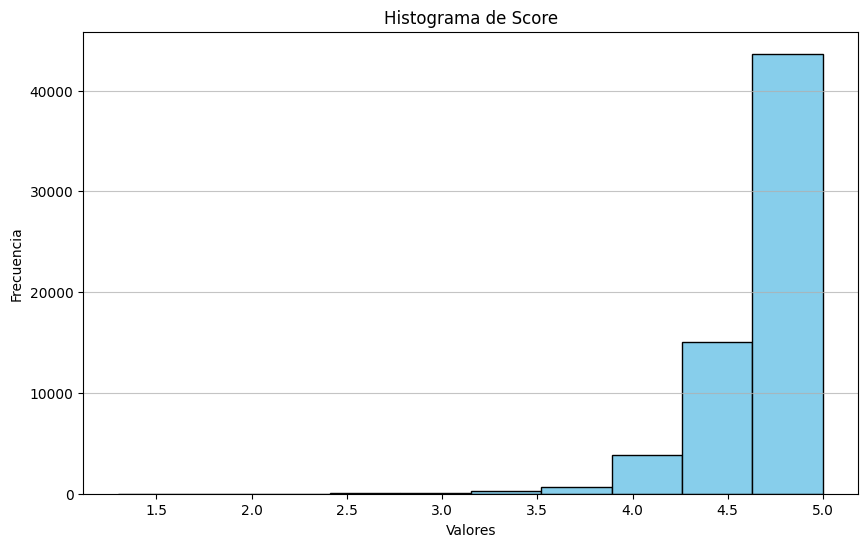

In [291]:
# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(uber['score'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma de Score')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

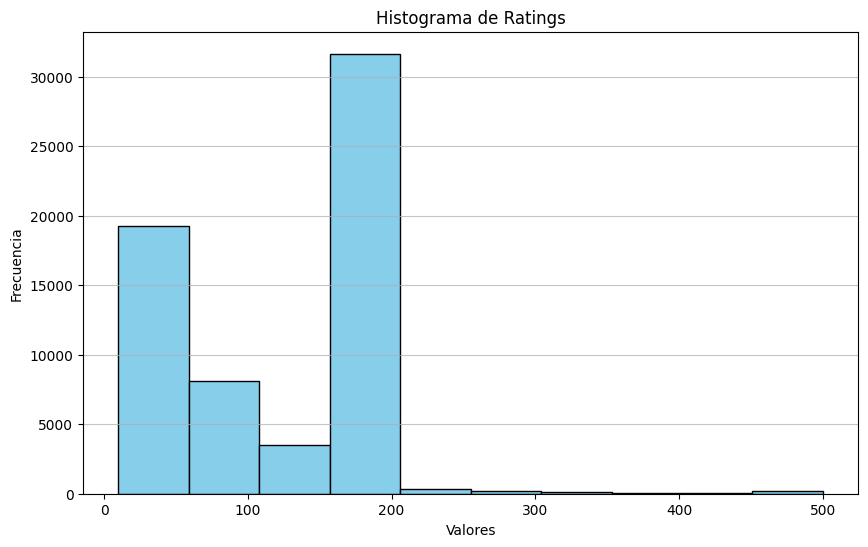

In [292]:
# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(uber['ratings'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma de Ratings')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

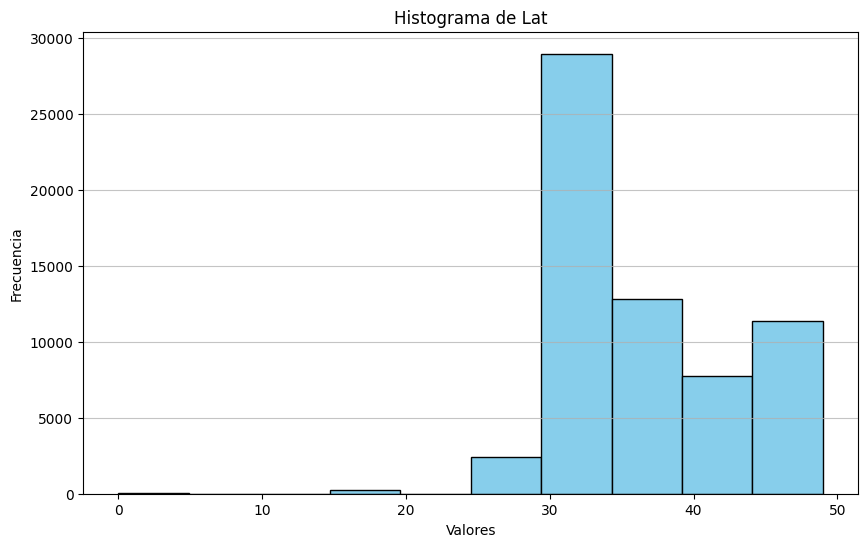

In [293]:
# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(uber['lat'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma de Lat')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

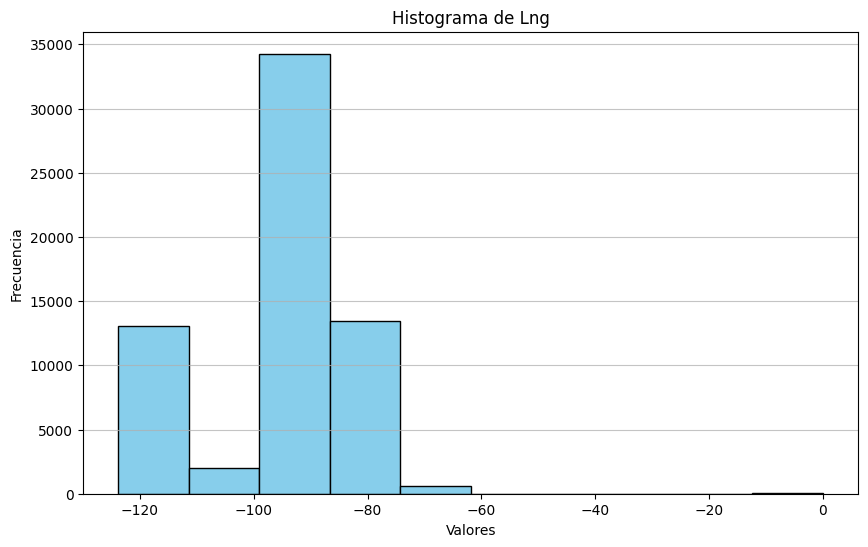

In [294]:
# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(uber['lng'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma de Lng')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

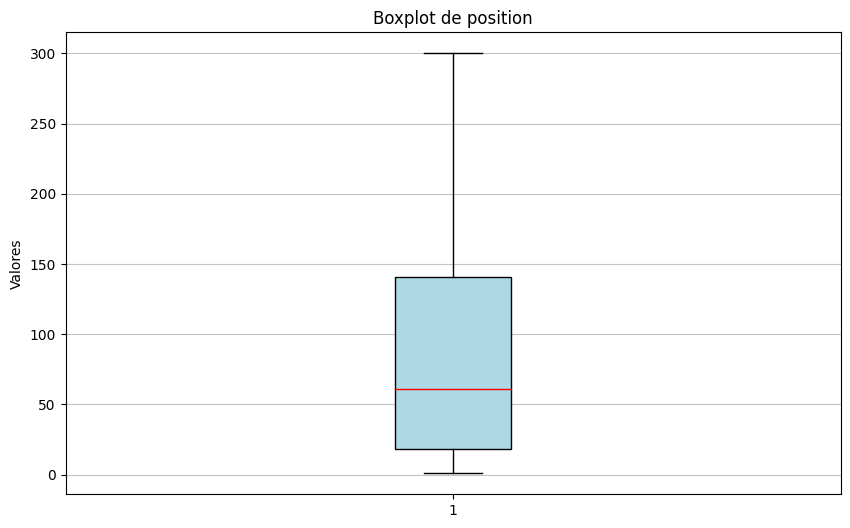

In [295]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(uber['position'], patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'),
            whiskerprops=dict(color='black'), capprops=dict(color='black'), 
            medianprops=dict(color='red'))
plt.title('Boxplot de position')
plt.ylabel('Valores')
plt.grid(axis='y', alpha=0.75)
plt.show()

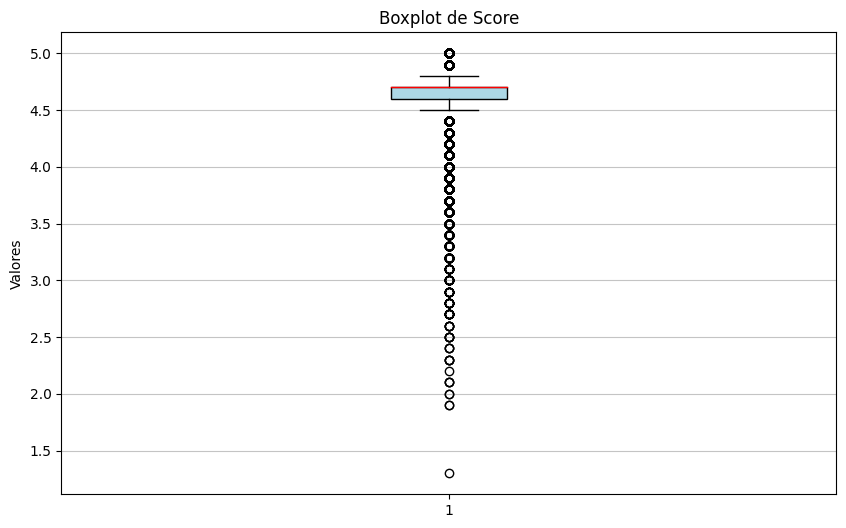

In [296]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(uber['score'], patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'),
            whiskerprops=dict(color='black'), capprops=dict(color='black'), 
            medianprops=dict(color='red'))
plt.title('Boxplot de Score')
plt.ylabel('Valores')
plt.grid(axis='y', alpha=0.75)
plt.show()

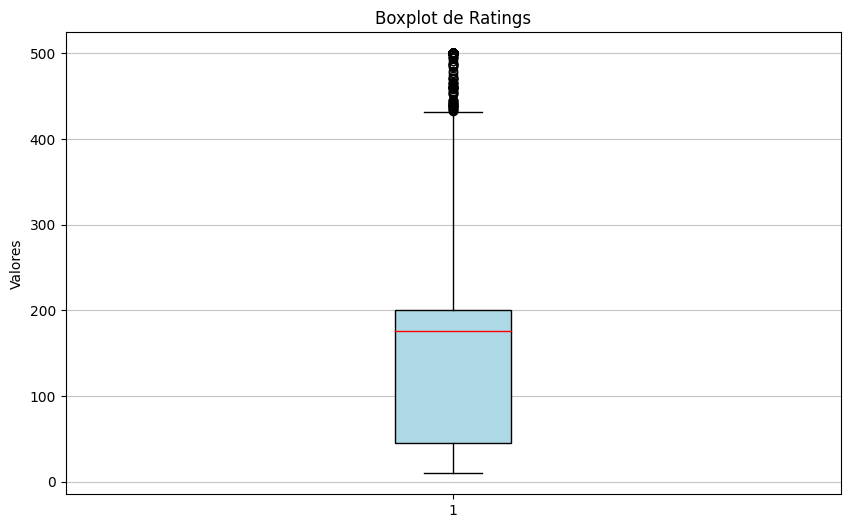

In [297]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(uber['ratings'], patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'),
            whiskerprops=dict(color='black'), capprops=dict(color='black'), 
            medianprops=dict(color='red'))
plt.title('Boxplot de Ratings')
plt.ylabel('Valores')
plt.grid(axis='y', alpha=0.75)
plt.show()

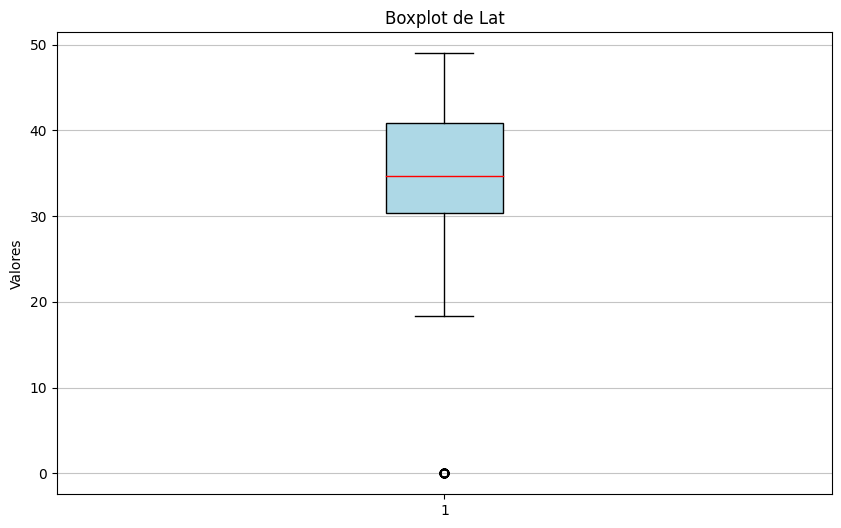

In [298]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(uber['lat'], patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'),
            whiskerprops=dict(color='black'), capprops=dict(color='black'), 
            medianprops=dict(color='red'))
plt.title('Boxplot de Lat')
plt.ylabel('Valores')
plt.grid(axis='y', alpha=0.75)
plt.show()

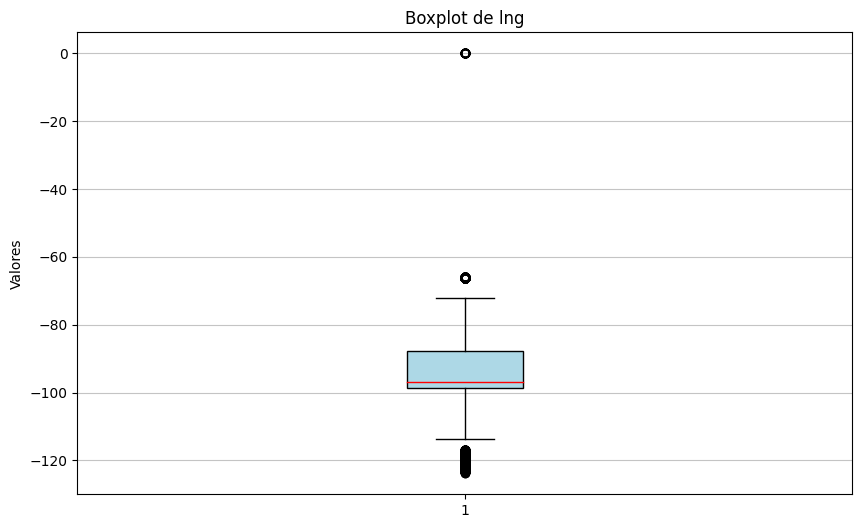

In [299]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(uber['lng'], patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'),
            whiskerprops=dict(color='black'), capprops=dict(color='black'), 
            medianprops=dict(color='red'))
plt.title('Boxplot de lng')
plt.ylabel('Valores')
plt.grid(axis='y', alpha=0.75)
plt.show()

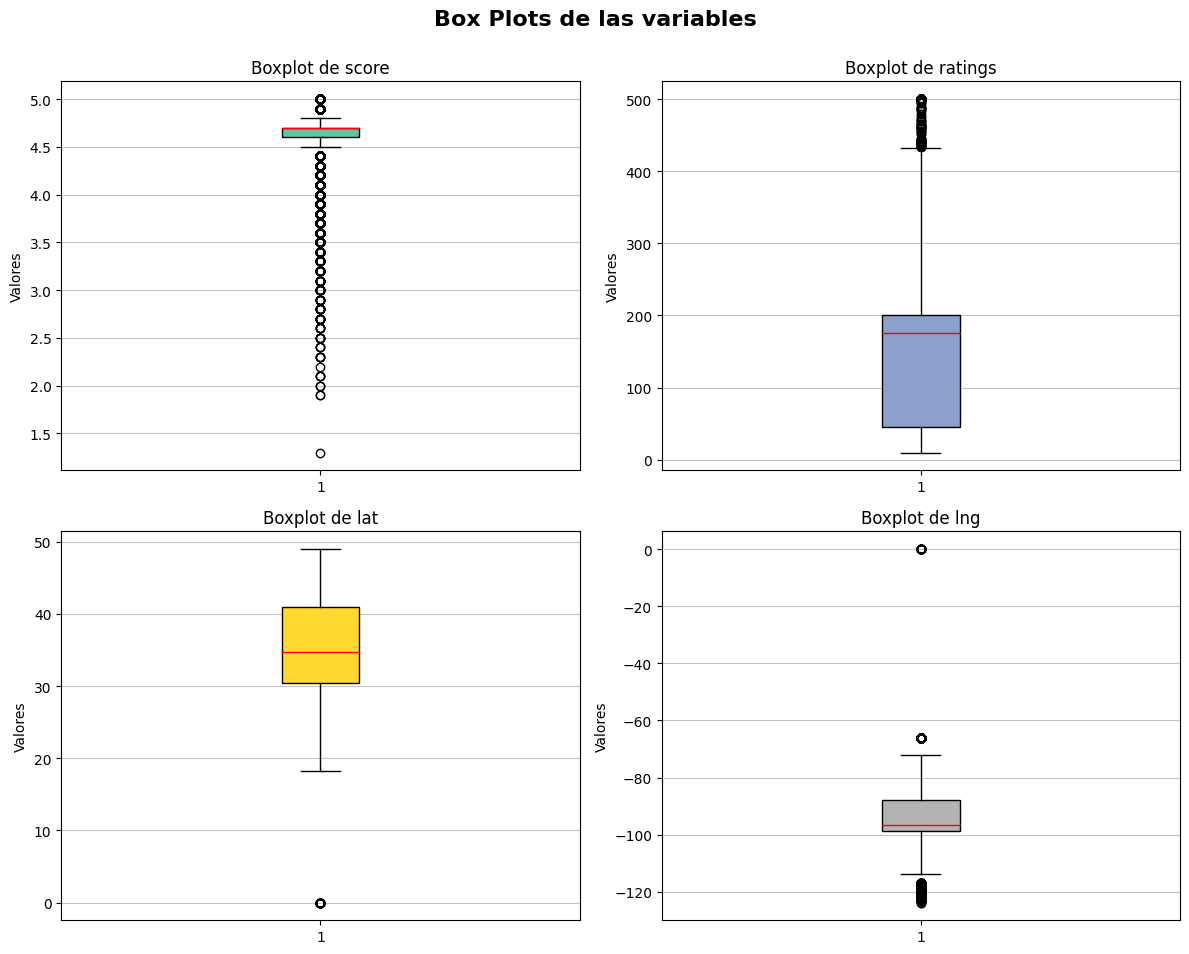

In [300]:
import matplotlib.pyplot as plt
import numpy as np

# Verificar que las columnas existen en el DataFrame
variables = ['score', 'ratings', 'lat', 'lng']
missing_vars = [var for var in variables if var not in uber.columns]
if missing_vars:
    raise ValueError(f"Las siguientes columnas no existen en el DataFrame: {missing_vars}")

# Configuración dinámica de subplots (máximo 3 columnas por fila)
n_vars = len(variables)
cols = 2  # Máximo 2 columnas por fila
rows = (n_vars + cols - 1) // cols  # Cálculo de filas necesarias

# Crear figura y subplots
fig, axs = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
axs = axs.flatten()  # Asegurarse de que sea iterable en caso de 1 fila

# Colores para los gráficos
colors = plt.cm.Set2(np.linspace(0, 1, len(variables)))

# Generar gráficos de caja
for i, (var, color) in enumerate(zip(variables, colors)):
    axs[i].boxplot(
        uber[var],
        patch_artist=True,
        boxprops=dict(facecolor=color, color='black'),
        whiskerprops=dict(color='black'),
        capprops=dict(color='black'),
        medianprops=dict(color='red')
    )
    axs[i].set_title(f'Boxplot de {var}')
    axs[i].set_ylabel('Valores')
    axs[i].grid(axis='y', alpha=0.75)

# Ocultar subplots vacíos (si hay más subplots que variables)
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

# Título general
fig.suptitle('Box Plots de las variables', fontsize=16, fontweight='bold', y=0.95)

# Ajustar diseño
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Espacio reservado para el título general
plt.show()



In [301]:
# Calcular la matriz de correlación solo con las columnas deseadas
correlation_matrix = uber[['position','score', 'ratings', 'lat', 'lng']].corr()

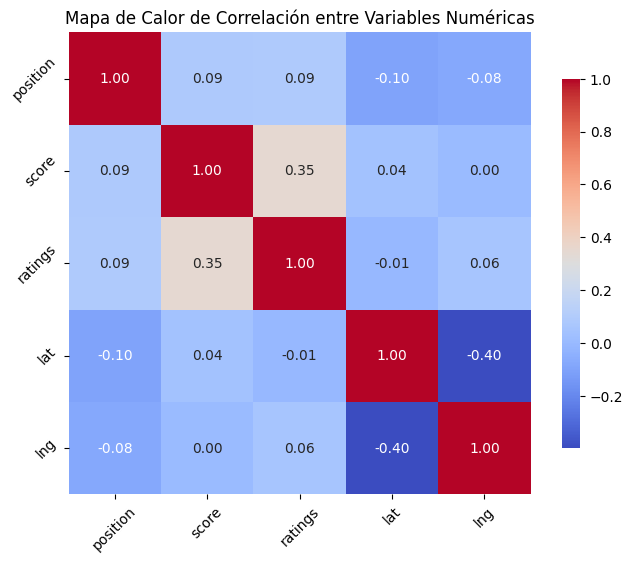

In [302]:
# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})

# Configurar títulos y etiquetas
plt.title('Mapa de Calor de Correlación entre Variables Numéricas')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

<Axes: title={'center': 'Diagrama de dispersión score vs ratings'}, xlabel='score', ylabel='ratings'>

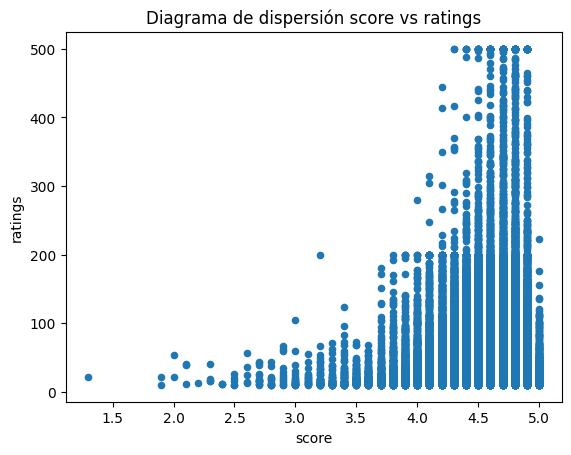

In [303]:
uber.plot(kind='scatter', x='score', y='ratings', title='Diagrama de dispersión score vs ratings')

<Axes: title={'center': 'Diagrama de dispersión de lng vs lat'}, xlabel='lng', ylabel='lat'>

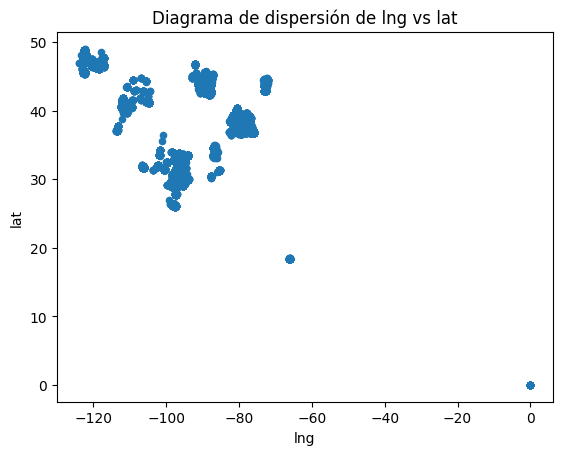

In [304]:
uber.plot(kind='scatter', x='lng', y='lat', title='Diagrama de dispersión de lng vs lat')

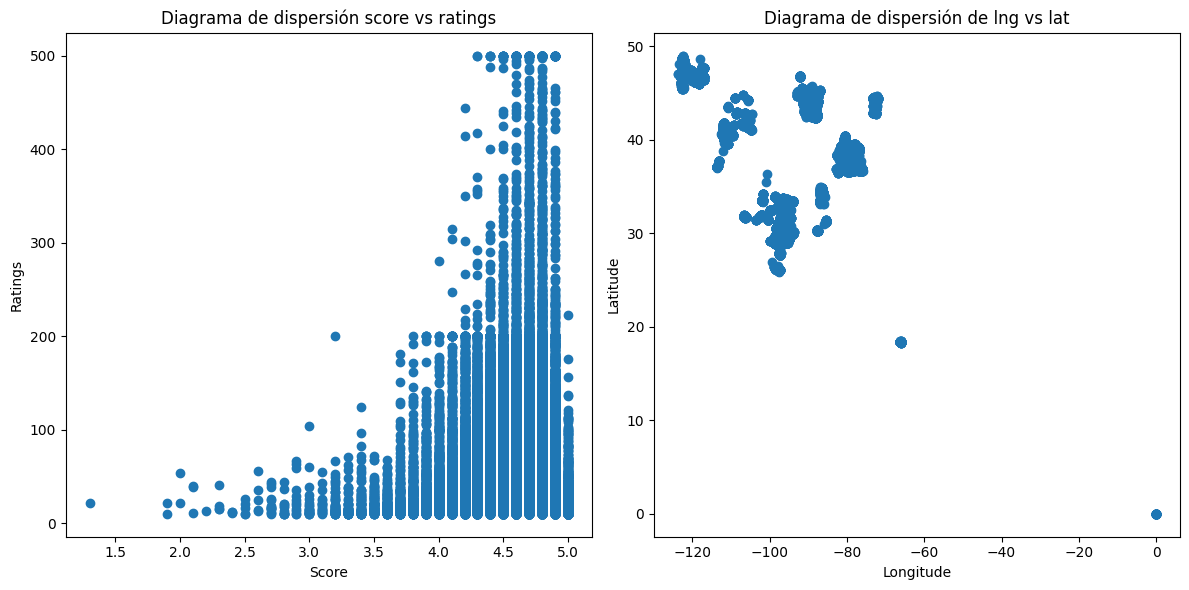

In [305]:
# Crear los subgráficos
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Primer gráfico de dispersión (score vs ratings)
axs[0].scatter(uber['score'], uber['ratings'])
axs[0].set_xlabel('Score')
axs[0].set_ylabel('Ratings')
axs[0].set_title('Diagrama de dispersión score vs ratings')

# Segundo gráfico de dispersión (lng vs lat)
axs[1].scatter(uber['lng'], uber['lat'])
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')
axs[1].set_title('Diagrama de dispersión de lng vs lat')

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

In [306]:
  
Q1 = uber[['score', 'ratings', 'lng']].quantile(0.25)
Q3 = uber[['score', 'ratings', 'lng']].quantile(0.75)
IQR = Q3 - Q1

outliers = ((uber[['score', 'ratings', 'lng']] < (Q1 - 1.5 * IQR)) | (uber[['score', 'ratings', 'lng']] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filtrar los datos sin outliers
uber_clean = uber[~outliers]
uber_clean = uber_clean.reset_index(drop=True)
# Resultados
print("Datos originales:", uber.shape)
print("Datos sin outliers:", uber_clean.shape)



Datos originales: (63469, 7)
Datos sin outliers: (41481, 7)


In [307]:
from sklearn.preprocessing import StandardScaler #estandarización

scaler = StandardScaler()
uber_clean[['position', 'ratings', 'lat', 'lng']] = scaler.fit_transform(uber_clean[['position', 'ratings', 'lat', 'lng']])


In [308]:
# Codificación ordinal
price_map = {"$": 1, "$$": 2, "$$$": 3, '$$$$':4}
uber_clean['price_range_ordinal'] = uber_clean['price_range'].map(price_map)

# Verifica la codificación
print(uber_clean[['price_range', 'price_range_ordinal']].head())

  price_range  price_range_ordinal
0           $                  1.0
1           $                  1.0
2           $                  1.0
3           $                  1.0
4           $                  1.0


In [309]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

ubicaciones = uber_clean[['lat', 'lng']]

# Escalar las variables
scaler = StandardScaler()
ubicaciones_scaled = scaler.fit_transform(ubicaciones)

# PCA
pca = PCA(n_components=1)  # Reducimos a una sola dimensión
zona = pca.fit_transform(ubicaciones_scaled)

# Agregar la nueva variable al DataFrame
uber_clean['zona'] = zona

# Imprimir la varianza explicada por el primer componente
print(f"Varianza explicada por el primer componente: {pca.explained_variance_ratio_[0]:.2%}")


Varianza explicada por el primer componente: 71.23%


In [310]:
uber_clean.nunique()

position                300
score                     4
ratings                 381
price_range               5
zip_code               1957
lat                     168
lng                     269
price_range_ordinal       4
zona                   1338
dtype: int64

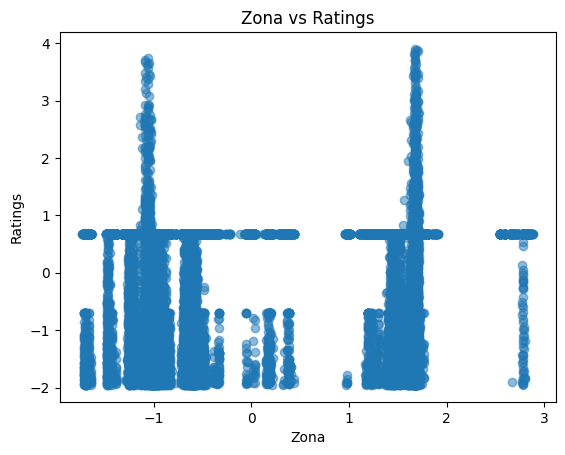

In [311]:
plt.scatter(uber_clean['zona'], uber_clean['ratings'], alpha=0.5)
plt.title('Zona vs Ratings')
plt.xlabel('Zona')
plt.ylabel('Ratings')
plt.show()


In [312]:
uber = uber_clean
# Crear variable objetivo binaria: popularidad
uber['popular'] = (uber['score'] > 4.6).astype(int)

uber.head()

,position,score,ratings,price_range,zip_code,lat,lng,price_range_ordinal,zona,popular
0,-0.881505,4.7,0.680698,$,35207.0,-0.243784,0.533643,1.0,0.204962,1
1,-1.006841,4.7,0.680698,$,35217.0,-0.243784,0.533643,1.0,0.204962,1
2,-1.044442,4.7,0.680698,$,35204.0,-0.264611,0.523514,1.0,0.183072,1
3,-0.906572,4.7,0.680698,$,35226.0,-0.285437,0.533643,1.0,0.175508,1
4,0.910806,4.7,-1.788303,$,35203.0,-0.264611,0.533643,1.0,0.190235,1


In [313]:
uber=uber.drop(['price_range', 'zip_code', 'lat', 'lng'], axis=1)

In [314]:
uber.head()

,position,score,ratings,price_range_ordinal,zona,popular
0,-0.881505,4.7,0.680698,1.0,0.204962,1
1,-1.006841,4.7,0.680698,1.0,0.204962,1
2,-1.044442,4.7,0.680698,1.0,0.183072,1
3,-0.906572,4.7,0.680698,1.0,0.175508,1
4,0.910806,4.7,-1.788303,1.0,0.190235,1


In [315]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from imblearn.under_sampling import RandomUnderSampler

In [316]:
# Crear variable objetivo binaria: popularidad
uber['popular'] = (uber['score'] > 4.6).astype(int)

# Variables predictoras y objetivo
X = uber[['zona', 'ratings', 'price_range_ordinal']]  # Incluye las variables clave
y = uber['popular']

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar el desbalance de clases en el conjunto de entrenamiento
class_counts = y_train.value_counts(normalize=False)
class_distribution = y_train.value_counts(normalize=True)
print("Conteo de clases en el conjunto de entrenamiento:\n", class_counts)
print("\nDistribución de clases en el conjunto de entrenamiento:\n", class_distribution)


Conteo de clases en el conjunto de entrenamiento:
 popular
1    26770
0     6414
Name: count, dtype: int64

Distribución de clases en el conjunto de entrenamiento:
 popular
1    0.806714
0    0.193286
Name: proportion, dtype: float64


In [317]:
# Submuestreo de la clase mayoritaria (clase '1')
rus = RandomUnderSampler(sampling_strategy={1: class_counts[0]}, random_state=42)  # Ajustamos hasta igualar la clase 0
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Verificar nuevo balance después del submuestreo
class_counts_resampled = y_train_resampled.value_counts(normalize=False)
class_distribution_resampled = y_train_resampled.value_counts(normalize=True)
print("\nNuevo conteo de clases en el conjunto de entrenamiento después del submuestreo:\n", class_counts_resampled)
print("\nNueva distribución de clases en el conjunto de entrenamiento después del submuestreo:\n", class_distribution_resampled)



Nuevo conteo de clases en el conjunto de entrenamiento después del submuestreo:
 popular
0    6414
1    6414
Name: count, dtype: int64

Nueva distribución de clases en el conjunto de entrenamiento después del submuestreo:
 popular
0    0.5
1    0.5
Name: proportion, dtype: float64


In [318]:
# Crear los modelos
logreg = LogisticRegression()
tree = DecisionTreeClassifier(random_state=42)
svc = SVC(probability=True, random_state=42)  # SVC con 'probability=True' para calcular la probabilidad de cada clase

# Entrenamiento de los modelos
logreg.fit(X_train_resampled, y_train_resampled)
tree.fit(X_train_resampled, y_train_resampled)
svc.fit(X_train_resampled, y_train_resampled)


SVC(probability=True, random_state=42)

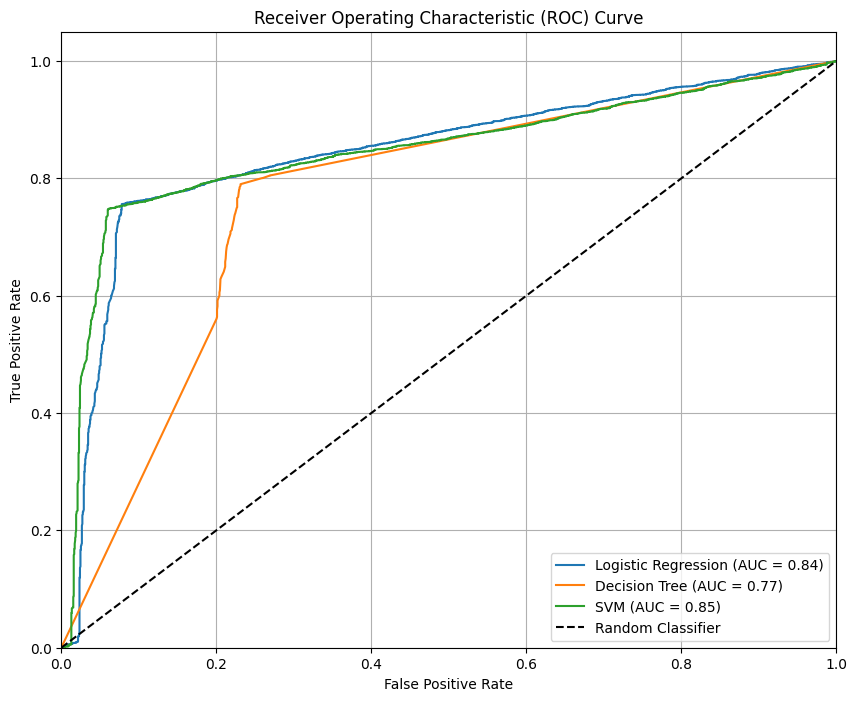

In [319]:
# Calcular la curva ROC para cada modelo
plt.figure(figsize=(10, 8))

models = {
    'Logistic Regression': logreg,
    'Decision Tree': tree,
    'SVM': svc
}

for model_name, model in models.items():
    # Obtener las probabilidades para la clase positiva (clase '1')
    y_score = model.predict_proba(X_test)[:, 1]
    
    # Calcular la curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Graficar la curva ROC
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Graficar la línea de no discriminación (diagonal)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Personalizar el gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [320]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Evaluación para Regresión Logística
y_pred_logreg = logreg.predict(X_test)
print("Evaluación para Regresión Logística:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Precision:", precision_score(y_test, y_pred_logreg))
print("Recall:", recall_score(y_test, y_pred_logreg))
print("F1 Score:", f1_score(y_test, y_pred_logreg))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_logreg))
print("Coeficientes de Regresión Logística:", logreg.coef_)

# Evaluación para Árbol de Decisión
y_pred_tree = tree.predict(X_test)
print("\nEvaluación para Árbol de Decisión:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree))
print("F1 Score:", f1_score(y_test, y_pred_tree))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_tree))
print("Importancia de las características (Árbol de Decisión):", tree.feature_importances_)

# Evaluación para SVC
y_pred_svc = svc.predict(X_test)
print("\nEvaluación para SVC:")
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Precision:", precision_score(y_test, y_pred_svc))
print("Recall:", recall_score(y_test, y_pred_svc))
print("F1 Score:", f1_score(y_test, y_pred_svc))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_svc))
if hasattr(svc, "coef_"):
    print("Coeficientes de SVC:", svc.coef_)
else:
    print("SVC no tiene coeficientes directos debido al uso de un kernel no lineal.")


Evaluación para Regresión Logística:
Accuracy: 0.7969145474267808
Precision: 0.9436844910286019
Recall: 0.7952095808383234
F1 Score: 0.8631082947436834
Matriz de Confusión:
 [[1300  317]
 [1368 5312]]
Coeficientes de Regresión Logística: [[0.11497907 1.40780053 0.01082866]]

Evaluación para Árbol de Decisión:
Accuracy: 0.7859467277329155
Precision: 0.9338287331917905
Recall: 0.7901197604790419
F1 Score: 0.8559844307492702
Matriz de Confusión:
 [[1243  374]
 [1402 5278]]
Importancia de las características (Árbol de Decisión): [0.24489088 0.7301104  0.02499872]

Evaluación para SVC:
Accuracy: 0.7866698806797637
Precision: 0.9663753799392097
Recall: 0.7615269461077845
F1 Score: 0.851808439383791
Matriz de Confusión:
 [[1440  177]
 [1593 5087]]
SVC no tiene coeficientes directos debido al uso de un kernel no lineal.


In [321]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
import numpy as np

# Crear un conjunto de datos ficticio para clasificación binaria (puedes sustituirlo por tus datos)
X, y = make_classification(n_samples=1000, n_features=3, n_informative=2, n_redundant=0, random_state=42)

# Definir los modelos a evaluar
models = {
    "Regresión Logística": LogisticRegression(),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

# Realizar validación cruzada para cada modelo
for model_name, model in models.items():
    # Evaluar el modelo utilizando validación cruzada
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # 5 particiones en la validación cruzada
    print(f"Resultados de validación cruzada para {model_name}:")
    print(f"Precisión promedio: {np.mean(cv_scores):.4f}")
    print(f"Desviación estándar: {np.std(cv_scores):.4f}")
    print("-" * 50)


Resultados de validación cruzada para Regresión Logística:
Precisión promedio: 0.8630
Desviación estándar: 0.0206
--------------------------------------------------
Resultados de validación cruzada para Árbol de Decisión:
Precisión promedio: 0.8840
Desviación estándar: 0.0309
--------------------------------------------------
Resultados de validación cruzada para SVM:
Precisión promedio: 0.8770
Desviación estándar: 0.0181
--------------------------------------------------
